# Task_2

In [211]:
import pandas as pd
import numpy as np
import scipy.stats as scs
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df = pd.read_csv('task_2.csv')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_id        52543 non-null  int64 
 1   event_timestamp  52543 non-null  int64 
 2   event_name       52543 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [214]:
df.head()

,player_id,event_timestamp,event_name
0,1058930,1632265733,install
1,1055681,1632412526,login
2,1057784,1632411775,login
3,1015250,1631923078,login
4,1040648,1631670785,login


In [215]:
df.dtypes

player_id           int64
event_timestamp     int64
event_name         object
dtype: object

In [216]:
df['event_timestamp'].describe()

count    5.254300e+04
mean     1.632071e+09
std      2.166859e+05
min      1.631664e+09
25%      1.631899e+09
50%      1.632073e+09
75%      1.632257e+09
max      1.632442e+09
Name: event_timestamp, dtype: float64

In [217]:
# Пропуски
df.isna().sum()

player_id          0
event_timestamp    0
event_name         0
dtype: int64

In [218]:
# Приведение времени к формату 

In [219]:
df['date'] = pd.to_datetime(df['event_timestamp'], unit="s").dt.date

In [220]:
df

,player_id,event_timestamp,event_name,date
0,1058930,1632265733,install,2021-09-21
1,1055681,1632412526,login,2021-09-23
2,1057784,1632411775,login,2021-09-23
3,1015250,1631923078,login,2021-09-17
4,1040648,1631670785,login,2021-09-15
...,...,...,...,...
52538,1060090,1632338669,install,2021-09-22
52539,1061249,1632403477,install,2021-09-23
52540,1062028,1632436754,install,2021-09-23
52541,1050142,1631918819,login,2021-09-17


#### Проверим есть ли пользователи не имеющие типа события install

In [221]:
df.dtypes

player_id           int64
event_timestamp     int64
event_name         object
date               object
dtype: object

In [222]:
100.0*df.query('event_name=="install"')['player_id'].nunique() / df.player_id.nunique()

82.99206017551191

**Только у 83% пользователей было событие install.**   
**Проблема может носить тех.характер: неверно регистрировались события или мы имем только часть данных и регистрация была у таких пользователей ранее.**  
**Поэтому таких пользователей исключим для дальнейшего решения задачи.**  

In [223]:
# Определим дату установки приложения. Для тех у кого не было события install будет заполнено NaN.

df['install_date'] = (df['player_id'].map(df[df['event_name'].eq('install')]
                                        .drop_duplicates('player_id')
                                        .set_index('player_id')['date']))

In [224]:
df

,player_id,event_timestamp,event_name,date,install_date
0,1058930,1632265733,install,2021-09-21,2021-09-21
1,1055681,1632412526,login,2021-09-23,2021-09-20
2,1057784,1632411775,login,2021-09-23,2021-09-21
3,1015250,1631923078,login,2021-09-17,NaN
4,1040648,1631670785,login,2021-09-15,NaN
...,...,...,...,...,...
52538,1060090,1632338669,install,2021-09-22,2021-09-22
52539,1061249,1632403477,install,2021-09-23,2021-09-23
52540,1062028,1632436754,install,2021-09-23,2021-09-23
52541,1050142,1631918819,login,2021-09-17,2021-09-17


In [225]:
# День захода в приложение с момента инсталяции
df['days_since_install'] = (df['date'] - df['install_date']).dt.days

In [226]:
df.head(10)

,player_id,event_timestamp,event_name,date,install_date,days_since_install
0,1058930,1632265733,install,2021-09-21,2021-09-21,0.0
1,1055681,1632412526,login,2021-09-23,2021-09-20,3.0
2,1057784,1632411775,login,2021-09-23,2021-09-21,2.0
3,1015250,1631923078,login,2021-09-17,NaN,NaN
4,1040648,1631670785,login,2021-09-15,NaN,NaN
5,1049800,1631893819,login,2021-09-17,2021-09-16,1.0
6,1055624,1632102327,install,2021-09-20,2021-09-20,0.0
7,1047430,1631754816,login,2021-09-16,2021-09-15,1.0
8,1060568,1632354197,install,2021-09-22,2021-09-22,0.0
9,1049258,1631896230,login,2021-09-17,2021-09-16,1.0


In [227]:
# Удаляем тех у кого нет события install
df_new = df.dropna()

In [241]:
df_new['install_date'] = pd.to_datetime(df_new['install_date'])

<ipython-input-241-c5703b2cb1d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['install_date'] = pd.to_datetime(df_new['install_date'])


#### Рассчитаем retention

In [242]:
def retention_rate(df, start, end, plot=True):

    cohort_counts = df.groupby(['install_date', 'days_since_install'], as_index = False) \
        .agg({'player_id':'nunique'}) \
        .pivot(index='install_date', columns='days_since_install', values='player_id')[start:end]

    Nday = cohort_counts[0] # 0 считается как 1-й день
    retention = cohort_counts.divide(Nday, axis=0).round(3)
    
    if plot:
           
        plt.figure(figsize=(16,12))
        plt.title('Retention Rate')
        ax = sns.heatmap(data=retention.iloc[:, 0:31], annot=True, fmt='.2%', vmin=0.0, vmax=1)
        ax.set_yticklabels(retention.index)
        fig=ax.get_figure()

    return cohort_counts.iloc[:, 0:31]

days_since_install,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
install_date,,,,,,,,,
2021-09-15,1327.0,428.0,247.0,174.0,140.0,85.0,71.0,72.0,44.0
2021-09-16,1284.0,398.0,253.0,160.0,117.0,84.0,67.0,49.0,NaN
2021-09-17,1483.0,495.0,252.0,165.0,130.0,93.0,83.0,NaN,NaN
2021-09-18,1779.0,566.0,286.0,191.0,158.0,111.0,NaN,NaN,NaN


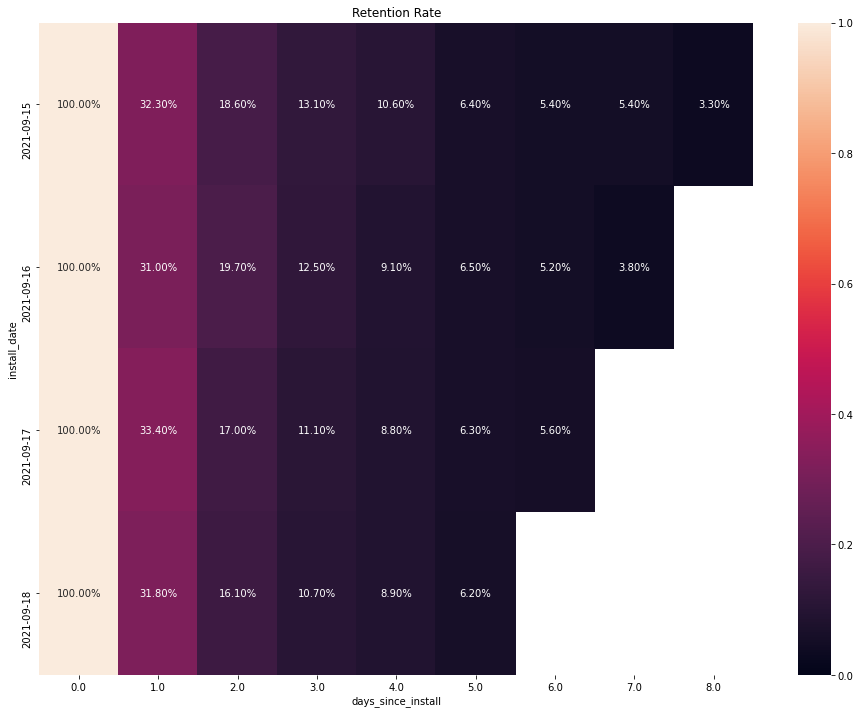

In [243]:
retention_rate(df, pd.to_datetime('2021-09-15'),  pd.to_datetime('2021-09-18'), True)

days_since_install,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
install_date,,,,,,,,,
2021-09-19,1674.0,509.0,271.0,172.0,109.0,NaN,NaN,NaN,NaN
2021-09-20,1380.0,404.0,229.0,159.0,NaN,NaN,NaN,NaN,NaN
2021-09-21,2123.0,523.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,1343.0,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


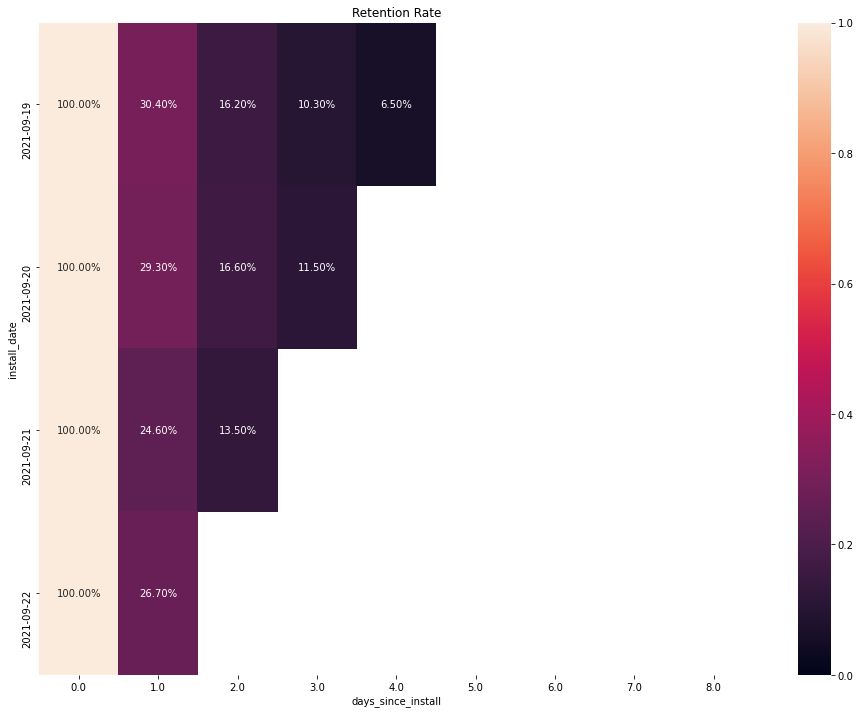

In [245]:
retention_rate(df, pd.to_datetime('2021-09-19'),pd.to_datetime('2021-09-22'), True)

In [248]:
# Таблицы с ретеншеном для двух групп
r_1509_1809 = retention_rate(df, pd.to_datetime('2021-09-15'), pd.to_datetime('2021-09-18'), False)
r_1909_2209 = retention_rate(df, pd.to_datetime('2021-09-19'),pd.to_datetime('2021-09-22'), False)

In [249]:
# Общее количество интсаляций в первой группе
install_1509_1809=r_1509_1809.reset_index().query('days_since_install in (0, 1, 2, 3)')[0].sum()
print(f'Количество установок в группе 1: {install_1509_1809:.0f}')

Количество установок в группе 1: 5873


In [250]:
# Общее количество интсаляций во второй группе
install_1909_2209=r_1909_2209.reset_index().query('days_since_install in (0, 1, 2, 3)')[0].sum()
print(f'Количество установок в группе 2: {install_1909_2209:.0f}')

Количество установок в группе 2: 6520


In [251]:
retention_1d_1509_1809 = r_1509_1809.reset_index().query('days_since_install in (0, 1, 2, 3)')[1].sum()
print(f'Количество пользователей вернувшихся в приложение в первый день в группе 1: {retention_1d_1509_1809:.0f}')

Количество пользователей вернувшихся в приложение в первый день в группе 1: 1887


In [252]:
retention_1d_1909_2209 = r_1909_2209.reset_index().query('days_since_install in (0, 1, 2, 3)')[1].sum()
print(f'Количество пользователей вернувшихся в приложение в первый день в группе 2: {retention_1d_1909_2209:.0f}')

Количество пользователей вернувшихся в приложение в первый день в группе 2: 1794


In [253]:
r_1D_1 = retention_1d_1509_1809/install_1509_1809
print(f'Retention 1-о дня в группе 1: {r_1D_1:.2%}')

Retention 1-о дня в группе 1: 32.13%


In [254]:
r_1D_2 = retention_1d_1909_2209/install_1909_2209
print(f'Retention 1-о дня в группе 1: {r_1D_2:.2%}')

Retention 1-о дня в группе 1: 27.52%


In [255]:
print(f'Разница между группой 1 и группой 2: {r_1D_1-r_1D_2:.2%}')

Разница между группой 1 и группой 2: 4.61%


In [211]:
# Размер групп графически.

In [256]:
group_size = pd.DataFrame({"A": [install_1509_1809], "B":[install_1909_2209]})

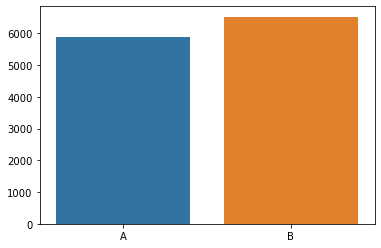

In [257]:
sns.barplot(data=group_size);

Для того чтобы ответить на вопрос что удержание первого дня выше, чем удержание ворого дня, необходимо убедиться, что любые обнаруженные различия являются статистически значимыми и что эти различия имеют достаточную статистическую мощность, а не вызваны случайным характером. Чтобы это проверить можно воспользоваться статистичскими тестами: Z-test или chi2, а также GLM(Обобщенные линейные модели). Я буду применять тест хи квадрат.

#### Проверка достаточности размера выборки

Сначала проверяется достаточно ли велик размер выборки (размер каждой когорты). Нет смысла проверять статистическую значимость, если результаты не обладают достаточной мощностью.

In [258]:
# Reference: https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

In [259]:
min_sample_size2 = min_sample_size(bcr=0.26, mde=0.03)
min_sample_size2

3477.489771190777

In [260]:
min_sample_size1 = min_sample_size(bcr=0.32, mde=0.03)
min_sample_size1

3885.63151737693

In [261]:
if (install_1509_1809>min_sample_size1) and (install_1909_2209>min_sample_size2):
    print('Размер выборки больше минимального. Можно провдить тест на стат.значимость')
else:
    print('Размер выборки меньше минимального')

Размер выборки больше минимального. Можно провдить тест на стат.значимость


### Chi squared test

In [262]:
# Функция расчета хи квадрат с помощью таблиц сопряженности. 
def chi_squared_function(e, o):
    """
    Returns fomulas calculation chi_squared
    Arguments:
        E - expected value;
        O - observed value.
    """
    return (e - o) * (e - o) / e

In [263]:
def chi_squared(s1, t1, s2, t2):
    """
    Returns chi sqared value.
    Arguments:
        s1 - count successes in group 1;
        s2 - count successes in group 2.
        t1 - count trials in group 1;
        t2 - count trials in group 2;
     References:
        https://www.evanmiller.org/ab-testing/chi-squared.html   
    """
    test_stat = 0.0
    mean_p = (s1 + s2) / (t1 + t2)
    test_stat += chi_squared_function(mean_p * t1, s1)
    test_stat += chi_squared_function((1-mean_p) * t1, t1 - s1)
    test_stat += chi_squared_function(mean_p * t2, s2)
    test_stat += chi_squared_function((1-mean_p) * t2, t2 - s2)
    return test_stat

In [264]:
# Функция расчета доврительных интервалов для групп
def confidence_interval(successes, trials, confidence_level=0.95, n_tails=2):
    """
    Returns lower and upper confidence intervals.
    Arguments:
        successes - successes in group;
        trials - trials in group.
        confidence_level ;
        n_tails - one-tail or 2-tail test;
    """ 
    alpha = (1 - confidence_level)/n_tails
    z_score = scs.norm.ppf(1 - alpha)
    s = successes/trials
    se = np.sqrt(s * (1 - s) / trials)
    
    lower_CI= s - z_score* se
    upper_CI = s + z_score* se

    return lower_CI, upper_CI

#### Расчет доверительных интервалов

In [265]:
# Таблица сопряженности
table_contingency = [[retention_1d_1509_1809, install_1509_1809-retention_1d_1509_1809, install_1509_1809],
         [retention_1d_1909_2209, install_1909_2209-retention_1d_1909_2209, install_1909_2209]]
table_contingency

[[1887.0, 3986.0, 5873.0], [1794.0, 4726.0, 6520.0]]

In [267]:
successes1, trials1 = table_contingency[0][0], table_contingency[0][2]
successes2, trials2 = table_contingency[1][0], table_contingency[1][2]

In [268]:
ci1 = confidence_interval(successes1, trials1)
ci2 = confidence_interval(successes2, trials2)

In [269]:
print(ci1, ci2)

(0.30935788887583154, 0.33324384788561917) (0.26431323712131505, 0.28599351134494266)


In [455]:
# Reference evan miller https://www.evanmiller.org/ab-testing/chi-squared.html
# def confidence_interval(s, t, z_score):
#     phat = s / t
#     a = phat + z_score * z_score / (2 * t)
#     b = z_score * np.sqrt((phat * (1 - phat) + z_score * z_score / (4 * t)) / t);
#     c = (1 + z_score * z_score / t)

#     return (a - b) / c, (a + b) / c

### Расчет хи квадрат

In [270]:
chi_sq = chi_squared(successes1, trials1, successes2, trials2)
p_value = 1.0 - scs.chi2.cdf(chi_sq, 2)
confidence_level = 0.95

In [271]:
# stat, p, dof, expected = chi2_contingency(table, correction=False)
print(f'chi_sqared={chi_sq:.2f}, p_value={p_value:.3f}')
if (p_value < 1.0 - confidence_level):
    if (successes1 / trials1 > successes2 / trials2):
        print(f'Границы доверительных интервалов:')
        print(f'Группа 1: {ci1[0]:.2%} - {ci1[1]:.2%}, Группа 2: {ci2[0]:.2%} - {ci2[1]:.2%}')
        print("Группа 1 статистически значимо более успешна")
    else:
        print("Группа 2 статистически значимо более успешна")
        print(f'Доверительные интервалы {ci2}')

chi_sqared=31.51, p_value=0.000
Границы доверительных интервалов:
Группа 1: 30.94% - 33.32%, Группа 2: 26.43% - 28.60%
Группа 1 статистически значимо более успешна


**Разница, которую мы обнаружили между коэффициентом удержания двух когорт, статистически значима. С вероятностью 95% фактический коэффициент удержания первой когорты колеблется от 30.94% до 33.32%, а второй когорты — от 26.43% до 28.60%. Поскольку эти два диапазона не пересекаются, то мы можем с вероятностью 95% сказать, что обнаруженное нами улучшение является не случайным.**